# 케라스로 만드는 얕은 신경망

얕은 신경망을 만들어 MNIST 숫자를 분류합니다.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rickiepark/dl-illustrated/blob/master/notebooks/5-1.shallow_net_in_keras.ipynb)

#### 라이브러리 적재

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

#### 데이터 적재

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

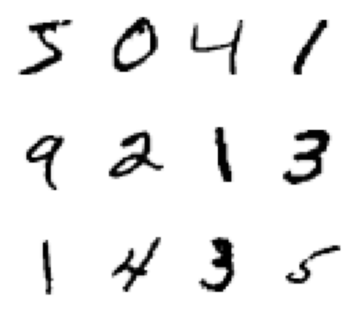

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

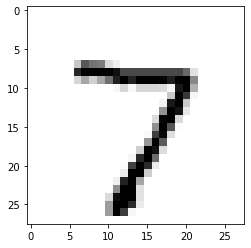

In [9]:
plt.imshow(X_valid[0], cmap='Greys')
plt.show()

In [10]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_valid[0]

7

#### 데이터 전처리

In [12]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [13]:
X_train /= 255
X_valid /= 255

In [14]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [16]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### 신경망 구조 설계

In [17]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
(64*784)

50176

In [20]:
(64*784)+64

50240

In [21]:
(10*64)+10

650

#### 모델 컴파일

In [22]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

#### 훈련!

In [23]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 6s 6ms/step - loss: 0.0962 - accuracy: 0.0877 - val_loss: 0.0938 - val_accuracy: 0.0913
Epoch 2/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0928 - accuracy: 0.0930 - val_loss: 0.0918 - val_accuracy: 0.1056
Epoch 3/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0914 - accuracy: 0.1230 - val_loss: 0.0908 - val_accuracy: 0.1506
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0906 - accuracy: 0.1632 - val_loss: 0.0902 - val_accuracy: 0.1775
Epoch 5/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0900 - accuracy: 0.1816 - val_loss: 0.0897 - val_accuracy: 0.1918
Epoch 6/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0895 - accuracy: 0.1964 - val_loss: 0.0892 - val_accuracy: 0.2127
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0891 - accuracy: 0.2178 - val_loss: 0.0888 - val_accuracy: 0.2354

In [24]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0273 - accuracy: 0.8673


[0.027292510494589806, 0.8672999739646912]